In [283]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.api import VAR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import OneHotEncoder

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
#Load the dataset
data = pd.read_csv('/content/drive/MyDrive/PP2/Data_set/DemandForcasting_final.csv')

In [286]:
data

,DateOfSale,Temperature,Humidity,Rainfall,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena,Country,PotSize,Season,Event,HighestSalesPlant
0,1/1/2012,27.5°C,81,227.57,8950,2410,3880,3620,2510,2280,2900,3690,France,5cm,Winter,IPM Dubai,Philo Sando
1,1/2/2012,25.7°C,80,166.40,6930,4000,3110,2360,3270,3270,2970,2910,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando
2,1/3/2012,26.3°C,78,147.26,2470,3380,8570,3530,2650,3290,2530,3290,France,8cm,Winter,IPM Dubai,Lemon lime
3,1/4/2012,25.2°C,81,191.72,2420,2440,8880,2760,3570,3630,2670,2310,United Kingdom,5cm,Winter,IPM Essen,Lemon lime
4,1/5/2012,27.8°C,77,236.65,3270,5990,3160,2750,2400,2570,3080,3640,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12/27/2022,29.9°C,83,227.73,6000,2090,2620,2860,2220,2830,3130,2050,France,5cm,Winter,IPM Dubai,Philo Sando
4014,12/28/2022,30.2°C,78,183.68,3000,3550,2520,2430,5080,2630,3050,3880,Argentina,5cm,Winter,IPM Essen,Ferns
4015,12/29/2022,31.5°C,79,229.71,2090,3380,3530,3690,6990,3690,2160,3920,Argentina,12cm,Winter,IPM Dubai,Ferns
4016,12/30/2022,25.7°C,74,170.50,3430,3090,3540,3930,3500,6410,3980,2120,Argentina,12cm,Winter,IPM Dubai,Zamioculus


In [287]:
data_copy = data.copy()

In [288]:
data_without_transform = data_copy.copy()

In [289]:
data_without_transform

,DateOfSale,Temperature,Humidity,Rainfall,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena,Country,PotSize,Season,Event,HighestSalesPlant
0,1/1/2012,27.5°C,81,227.57,8950,2410,3880,3620,2510,2280,2900,3690,France,5cm,Winter,IPM Dubai,Philo Sando
1,1/2/2012,25.7°C,80,166.40,6930,4000,3110,2360,3270,3270,2970,2910,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando
2,1/3/2012,26.3°C,78,147.26,2470,3380,8570,3530,2650,3290,2530,3290,France,8cm,Winter,IPM Dubai,Lemon lime
3,1/4/2012,25.2°C,81,191.72,2420,2440,8880,2760,3570,3630,2670,2310,United Kingdom,5cm,Winter,IPM Essen,Lemon lime
4,1/5/2012,27.8°C,77,236.65,3270,5990,3160,2750,2400,2570,3080,3640,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12/27/2022,29.9°C,83,227.73,6000,2090,2620,2860,2220,2830,3130,2050,France,5cm,Winter,IPM Dubai,Philo Sando
4014,12/28/2022,30.2°C,78,183.68,3000,3550,2520,2430,5080,2630,3050,3880,Argentina,5cm,Winter,IPM Essen,Ferns
4015,12/29/2022,31.5°C,79,229.71,2090,3380,3530,3690,6990,3690,2160,3920,Argentina,12cm,Winter,IPM Dubai,Ferns
4016,12/30/2022,25.7°C,74,170.50,3430,3090,3540,3930,3500,6410,3980,2120,Argentina,12cm,Winter,IPM Dubai,Zamioculus


In [290]:
columns_remove= ['DateOfSale', 'Temperature', 'Humidity', 'Rainfall', 'Philo Sando', 'Aglonema', 'Lemon lime',
                     'Dendrobium', 'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena']


In [291]:
data_without_transform = data_without_transform.drop(columns = columns_remove)

In [292]:
data_without_transform

,Country,PotSize,Season,Event,HighestSalesPlant
0,France,5cm,Winter,IPM Dubai,Philo Sando
1,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando
2,France,8cm,Winter,IPM Dubai,Lemon lime
3,United Kingdom,5cm,Winter,IPM Essen,Lemon lime
4,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema
...,...,...,...,...,...
4013,France,5cm,Winter,IPM Dubai,Philo Sando
4014,Argentina,5cm,Winter,IPM Essen,Ferns
4015,Argentina,12cm,Winter,IPM Dubai,Ferns
4016,Argentina,12cm,Winter,IPM Dubai,Zamioculus


In [293]:
# Display data types of each column
print(data.dtypes)

DateOfSale            object
Temperature           object
Humidity               int64
Rainfall             float64
Philo Sando            int64
Aglonema               int64
Lemon lime             int64
Dendrobium             int64
Ferns                  int64
Zamioculus             int64
Bengamina              int64
Dracaena               int64
Country               object
PotSize               object
Season                object
Event                 object
HighestSalesPlant     object
dtype: object


In [294]:
categorical_columns = ['Country', 'PotSize', 'Season', 'Event', 'HighestSalesPlant']

In [295]:
numerical_columns = ['Temperature','Humidity', 'Rainfall', 'Philo Sando', 'Aglonema', 'Lemon lime',
                     'Dendrobium', 'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena']


In [296]:
# Convert "DateOfSale" column to datetime type
data['DateOfSale'] = pd.to_datetime(data['DateOfSale'])
# Extract numerical part from Temperature and convert to numeric type
data['Temperature'] = data['Temperature'].str.extract('(\d+)').astype(float)

In [297]:
# Display data types of each column
print(data.dtypes)

DateOfSale           datetime64[ns]
Temperature                 float64
Humidity                      int64
Rainfall                    float64
Philo Sando                   int64
Aglonema                      int64
Lemon lime                    int64
Dendrobium                    int64
Ferns                         int64
Zamioculus                    int64
Bengamina                     int64
Dracaena                      int64
Country                      object
PotSize                      object
Season                       object
Event                        object
HighestSalesPlant            object
dtype: object


# Data Preprocessing

In [298]:
# Handle missing values
# Check for missing values in each column
data.isnull().sum() #no missing values so far

DateOfSale           0
Temperature          0
Humidity             0
Rainfall             0
Philo Sando          0
Aglonema             0
Lemon lime           0
Dendrobium           0
Ferns                0
Zamioculus           0
Bengamina            0
Dracaena             0
Country              0
PotSize              0
Season               0
Event                0
HighestSalesPlant    0
dtype: int64

In [299]:
#temperature outliers checking

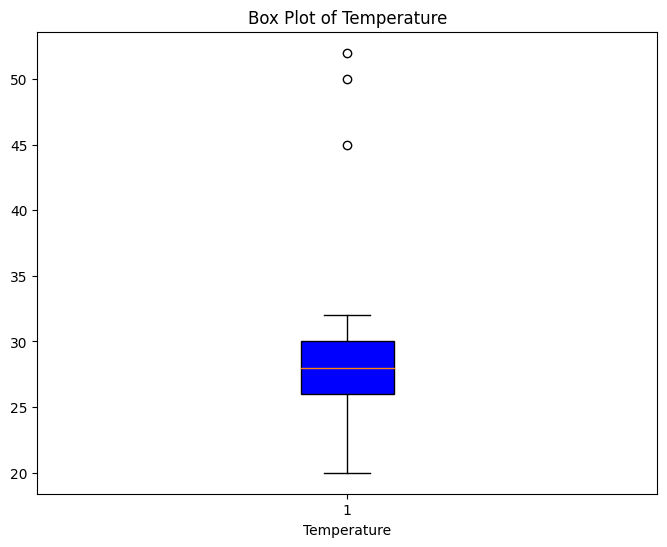

In [300]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Temperature'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('blue')
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [301]:
# Calculate mean and standard deviation
mean = data['Temperature'].mean()
std = data['Temperature'].std()

# Define the acceptable range
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

In [302]:
# Replace outlier values with the mean
data['Temperature'] = data['Temperature'].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

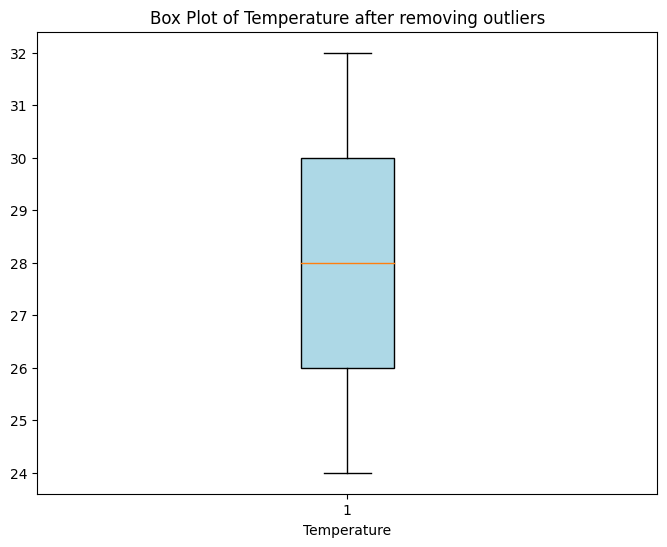

In [303]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Temperature'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('lightblue')
plt.title('Box Plot of Temperature after removing outliers')
plt.xlabel('Temperature')
plt.show()

In [304]:
#humidity outliers checking

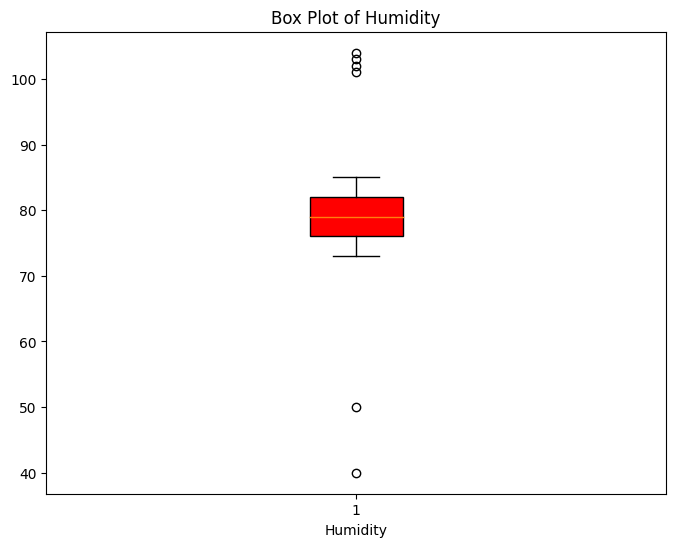

In [305]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Humidity'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('red')
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.show()

In [306]:
# Calculate mean and standard deviation
mean = data['Humidity'].mean()
std = data['Humidity'].std()

# Define the acceptable range
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

In [307]:
# Replace outlier values with the mean
data['Humidity'] = data['Humidity'].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

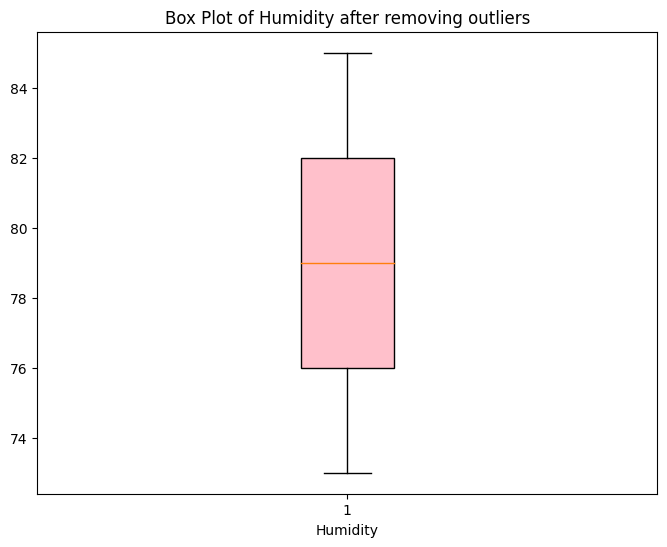

In [308]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Humidity'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('pink')
plt.title('Box Plot of Humidity after removing outliers')
plt.xlabel('Humidity')
plt.show()

In [309]:
#rainfall check for outliers

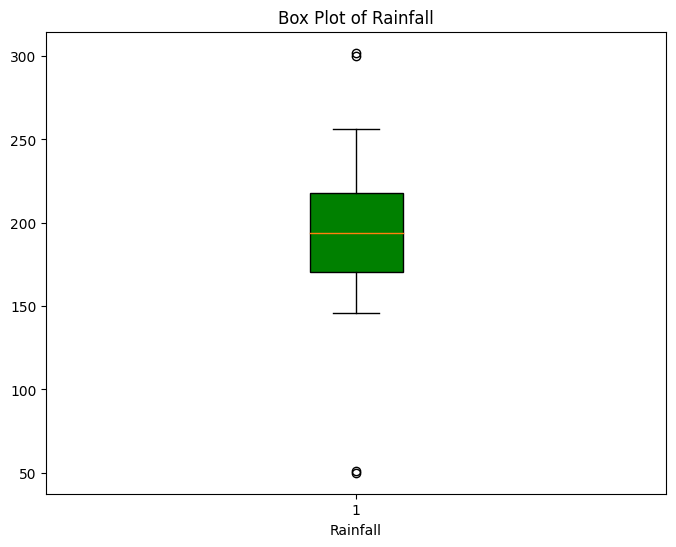

In [310]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Rainfall'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('green')
plt.title('Box Plot of Rainfall')
plt.xlabel('Rainfall')
plt.show()

In [311]:
# Calculate mean and standard deviation
mean = data['Rainfall'].mean()
std = data['Rainfall'].std()

# Define the acceptable range
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

In [312]:
# Replace outlier values with the mean
data['Rainfall'] = data['Rainfall'].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

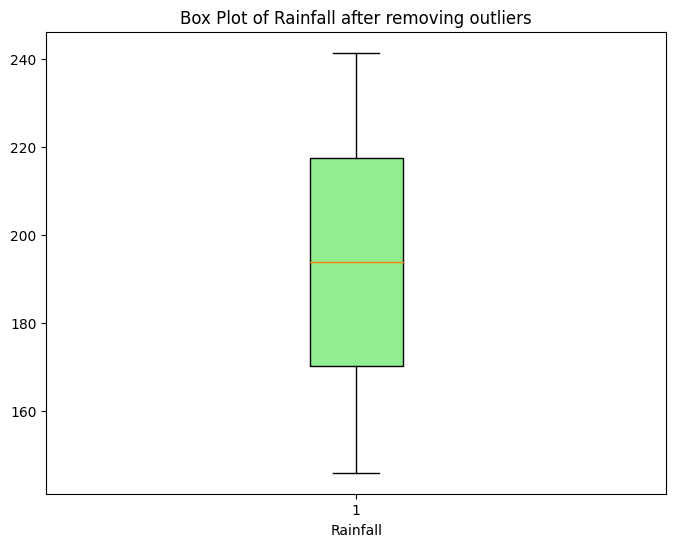

In [313]:
# Create a box plot for the Temperature column
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Rainfall'], patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('lightgreen')
plt.title('Box Plot of Rainfall after removing outliers')
plt.xlabel('Rainfall')
plt.show()

In [314]:
#plant type checking outliers

In [315]:
plants_columns = ['Philo Sando', 'Aglonema', 'Lemon lime',
                     'Dendrobium', 'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena']


In [316]:
plants_columns_data = data[plants_columns].copy()

In [317]:
plants_columns_data

,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena
0,8950,2410,3880,3620,2510,2280,2900,3690
1,6930,4000,3110,2360,3270,3270,2970,2910
2,2470,3380,8570,3530,2650,3290,2530,3290
3,2420,2440,8880,2760,3570,3630,2670,2310
4,3270,5990,3160,2750,2400,2570,3080,3640
...,...,...,...,...,...,...,...,...
4013,6000,2090,2620,2860,2220,2830,3130,2050
4014,3000,3550,2520,2430,5080,2630,3050,3880
4015,2090,3380,3530,3690,6990,3690,2160,3920
4016,3430,3090,3540,3930,3500,6410,3980,2120


In [318]:
categorical_columns = ['Country', 'PotSize', 'Season', 'Event', 'HighestSalesPlant']

In [319]:
categorical_columns_data = data[categorical_columns].copy()

In [320]:
categorical_columns_data

,Country,PotSize,Season,Event,HighestSalesPlant
0,France,5cm,Winter,IPM Dubai,Philo Sando
1,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando
2,France,8cm,Winter,IPM Dubai,Lemon lime
3,United Kingdom,5cm,Winter,IPM Essen,Lemon lime
4,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema
...,...,...,...,...,...
4013,France,5cm,Winter,IPM Dubai,Philo Sando
4014,Argentina,5cm,Winter,IPM Essen,Ferns
4015,Argentina,12cm,Winter,IPM Dubai,Ferns
4016,Argentina,12cm,Winter,IPM Dubai,Zamioculus


In [321]:
# Calculate frequency counts for each categorical column
frequency_counts = {}
for column in categorical_columns_data:
    frequency_counts[column] = data[column].value_counts()


In [322]:
# Print the frequency counts
for column, counts in frequency_counts.items():
    print(f"Frequency counts for '{column}':")
    print(counts)
    print()

Frequency counts for 'Country':
France            1188
Japan              789
Brazil             681
Argentina          633
Canada             464
Netherland          92
United Kingdom      86
USA                 85
Name: Country, dtype: int64

Frequency counts for 'PotSize':
5cm     1684
12cm    1644
8cm      690
Name: PotSize, dtype: int64

Frequency counts for 'Season':
Spring    1012
Summer    1012
Autumn    1001
Winter     993
Name: Season, dtype: int64

Frequency counts for 'Event':
FlowerTrials                                      357
Canadian Greenhouse Conference                    351
HortiFlora Expo                                   344
Chelsea Flower Show                               343
IPM Essen                                         336
AmericanHort Cultivate                            333
Japan Grand Prix International Orchid Festival    331
Flower Expo China                                 330
IPM Dubai                                         326
Keukenhof Flower Exh

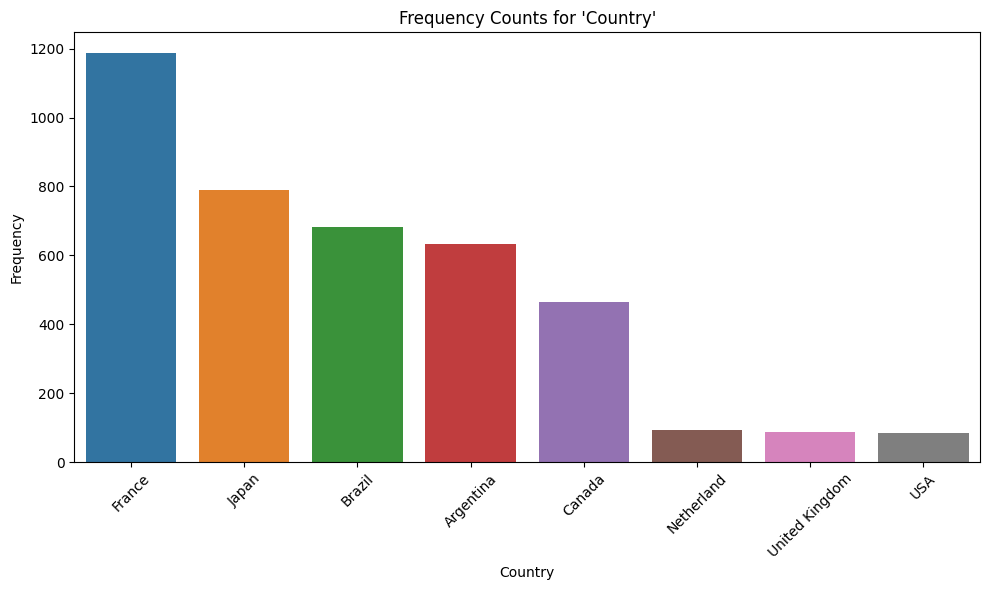

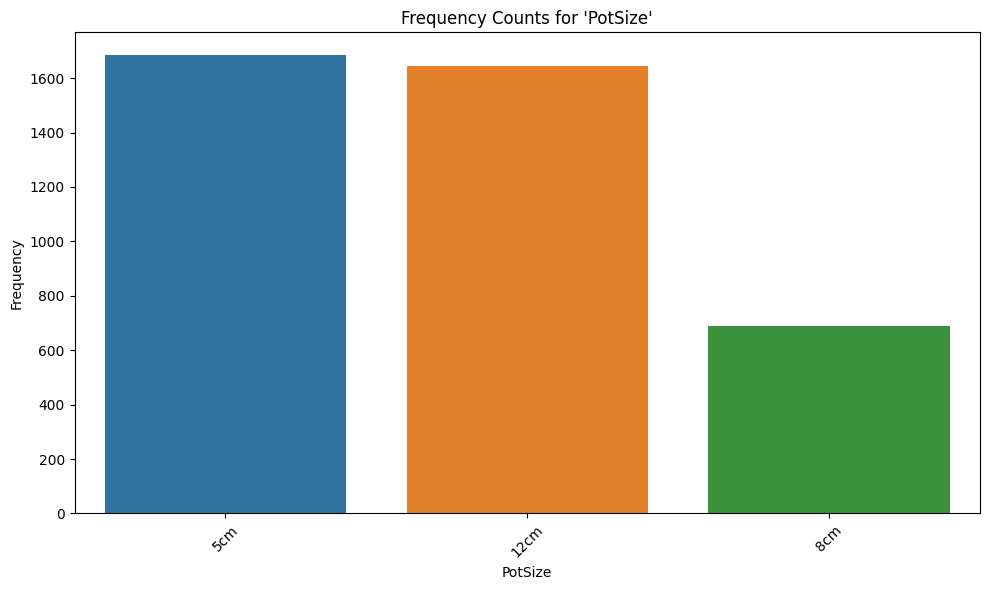

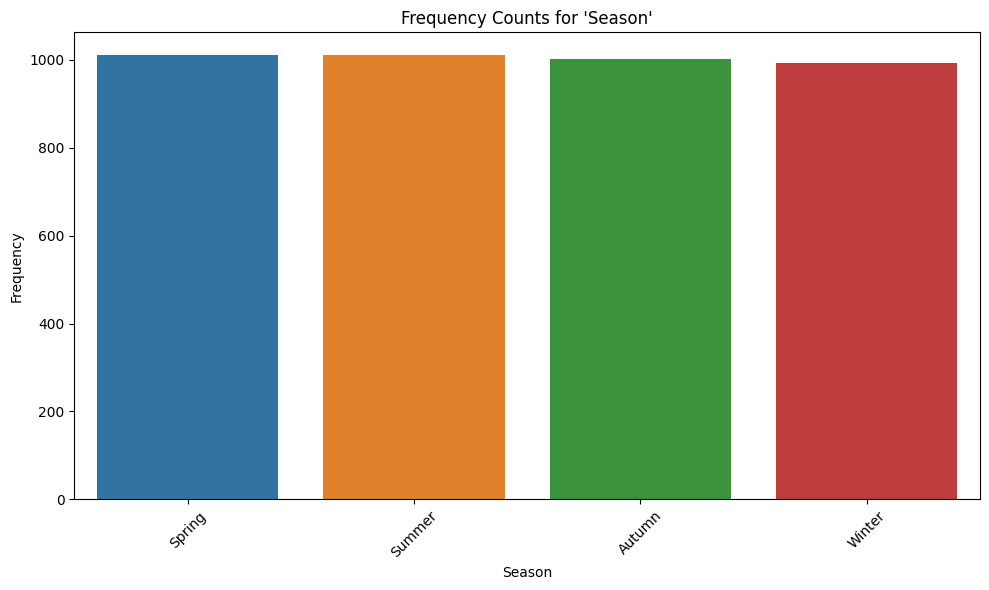

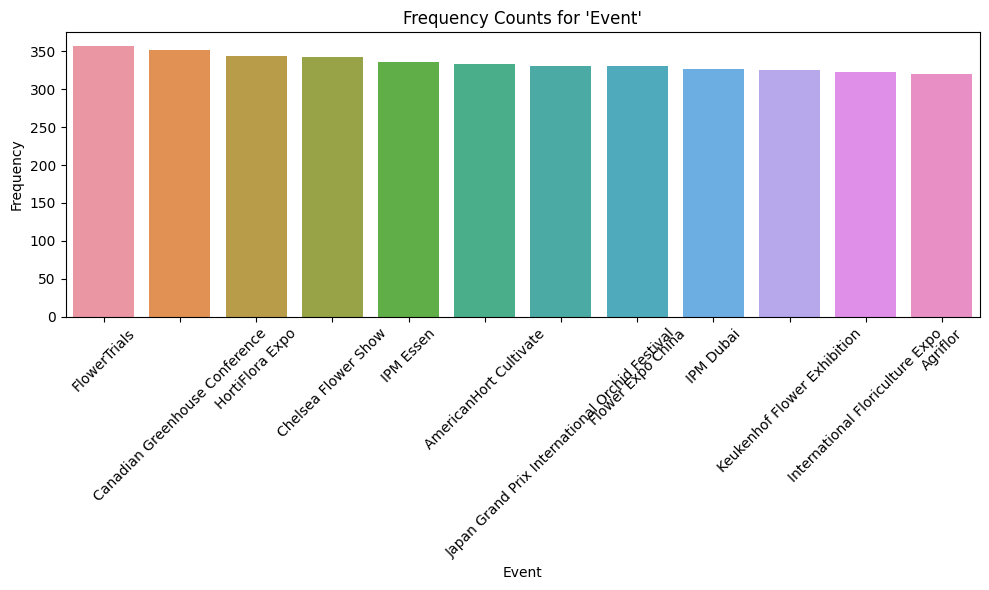

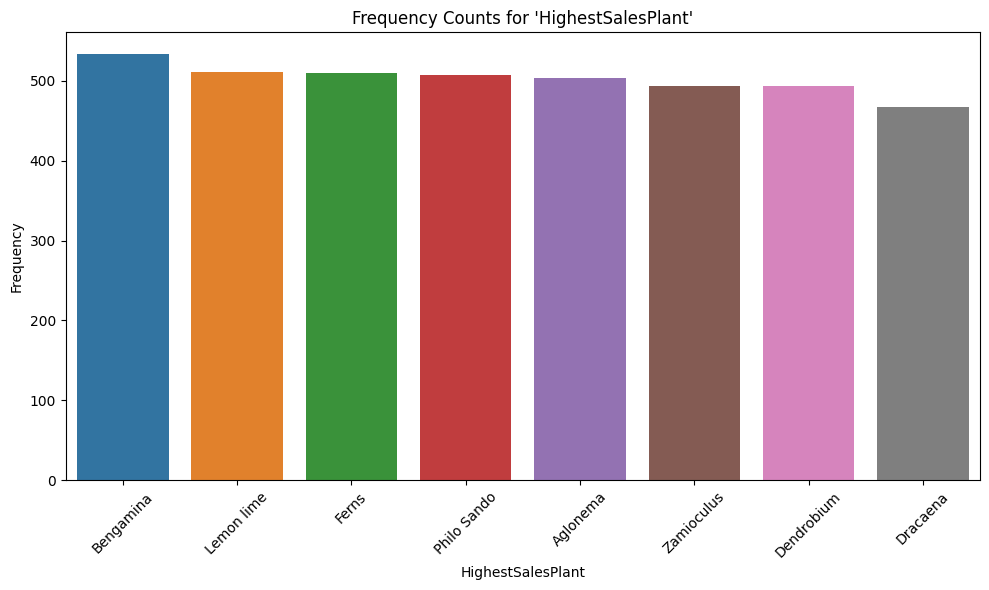

In [323]:
# Plot bar charts for frequency counts
for column, counts in frequency_counts.items():
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f"Frequency Counts for '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

In [324]:
columns_remove_plants= ['Philo Sando', 'Aglonema', 'Lemon lime',
                     'Dendrobium', 'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena']


In [325]:
data_new = data.drop(columns =columns_remove_plants )

In [326]:
#Preprocessed Data of features
data_new

,DateOfSale,Temperature,Humidity,Rainfall,Country,PotSize,Season,Event,HighestSalesPlant
0,2012-01-01,27.0,81.0,227.57,France,5cm,Winter,IPM Dubai,Philo Sando
1,2012-01-02,25.0,80.0,166.40,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando
2,2012-01-03,26.0,78.0,147.26,France,8cm,Winter,IPM Dubai,Lemon lime
3,2012-01-04,25.0,81.0,191.72,United Kingdom,5cm,Winter,IPM Essen,Lemon lime
4,2012-01-05,27.0,77.0,236.65,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema
...,...,...,...,...,...,...,...,...,...
4013,2022-12-27,29.0,83.0,227.73,France,5cm,Winter,IPM Dubai,Philo Sando
4014,2022-12-28,30.0,78.0,183.68,Argentina,5cm,Winter,IPM Essen,Ferns
4015,2022-12-29,31.0,79.0,229.71,Argentina,12cm,Winter,IPM Dubai,Ferns
4016,2022-12-30,25.0,74.0,170.50,Argentina,12cm,Winter,IPM Dubai,Zamioculus


In [327]:
data_new.to_csv('preprocessedFeatureData-data_new.csv', index=False)

In [328]:
data_withoutOutliers = pd.read_csv('/content/drive/MyDrive/PP2/Demand/preprocessedFeatureData_U.csv')

#  Exploratory Data Analysis (EDA)

In [329]:
data_withoutOutliers

,DateOfSale,Temperature,Humidity,Rainfall,Country,PotSize,Season,Event,HighestSalesPlant,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena
0,1/1/2012,27.0,81.0,227.57,France,5cm,Winter,IPM Dubai,Philo Sando,8950,2410,3880,3620,2510,2280,2900,3690
1,1/2/2012,25.0,80.0,166.40,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando,6930,4000,3110,2360,3270,3270,2970,2910
2,1/3/2012,26.0,78.0,147.26,France,8cm,Winter,IPM Dubai,Lemon lime,2470,3380,8570,3530,2650,3290,2530,3290
3,1/4/2012,25.0,81.0,191.72,United Kingdom,5cm,Winter,IPM Essen,Lemon lime,2420,2440,8880,2760,3570,3630,2670,2310
4,1/5/2012,27.0,77.0,236.65,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema,3270,5990,3160,2750,2400,2570,3080,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12/27/2022,29.0,83.0,227.73,France,5cm,Winter,IPM Dubai,Philo Sando,6000,2090,2620,2860,2220,2830,3130,2050
4014,12/28/2022,30.0,78.0,183.68,Argentina,5cm,Winter,IPM Essen,Ferns,3000,3550,2520,2430,5080,2630,3050,3880
4015,12/29/2022,31.0,79.0,229.71,Argentina,12cm,Winter,IPM Dubai,Ferns,2090,3380,3530,3690,6990,3690,2160,3920
4016,12/30/2022,25.0,74.0,170.50,Argentina,12cm,Winter,IPM Dubai,Zamioculus,3430,3090,3540,3930,3500,6410,3980,2120


In [330]:
# Assuming data_withoutOutliers is a DataFrame
missing_value_counts = data_withoutOutliers.isnull().sum()

# Calculate the sum of missing values for each column
sum_of_missing_values = missing_value_counts.sum()

print("Sum of missing values:", sum_of_missing_values)

Sum of missing values: 0


In [331]:
# Display summary statistics
summary_stats = data_withoutOutliers.describe()
print(summary_stats)

       Temperature     Humidity     Rainfall  Philo Sando     Aglonema  \
count  4018.000000  4018.000000  4018.000000  4018.000000  4018.000000   
mean     28.132550    79.031415   193.991437  3505.059731  3495.221503   
std       2.173201     3.742590    27.482668  1478.757008  1508.975475   
min      24.000000    73.000000   146.070000  2000.000000  2000.000000   
25%      26.000000    76.000000   170.395000  2570.000000  2550.000000   
50%      28.000000    79.000000   193.991318  3140.000000  3110.000000   
75%      30.000000    82.000000   217.502500  3717.500000  3720.000000   
max      32.000000    85.000000   241.430000  9000.000000  9000.000000   

        Lemon lime   Dendrobium        Ferns   Zamioculus    Bengamina  \
count  4018.000000  4018.000000  4018.000000  4018.000000  4018.000000   
mean   3500.209059  3491.055251  3510.423096  3494.216028  3530.704331   
std    1479.841293  1486.842126  1489.234949  1500.072489  1512.207327   
min    2000.000000  2000.000000  2000

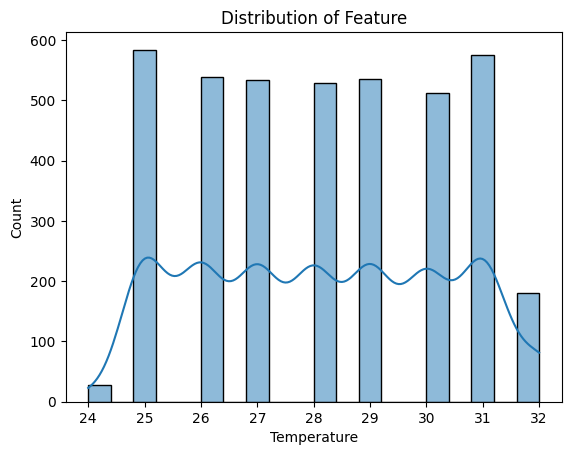

In [332]:
# Temperature
sns.histplot(data_withoutOutliers['Temperature'], bins=20, kde=True)
plt.title('Distribution of Feature')
plt.show()

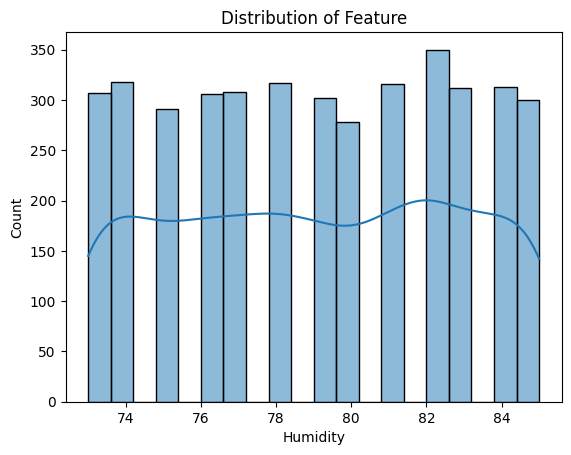

In [333]:
# Humidity
sns.histplot(data_withoutOutliers['Humidity'], bins=20, kde=True)
plt.title('Distribution of Feature')
plt.show()

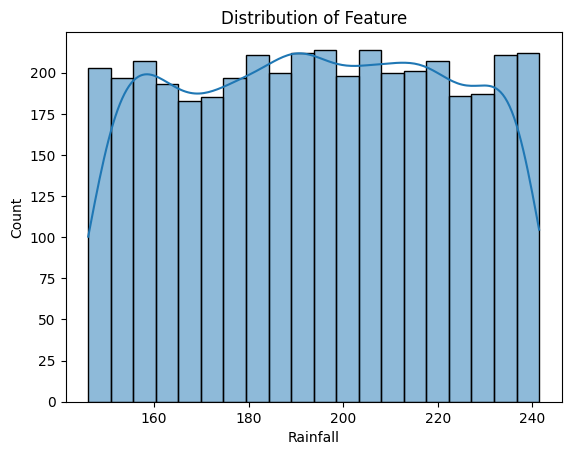

In [334]:
# Rainfall
sns.histplot(data_withoutOutliers['Rainfall'], bins=20, kde=True)
plt.title('Distribution of Feature')
plt.show()

<ipython-input-335-e721158e7ae2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_withoutOutliers.corr()


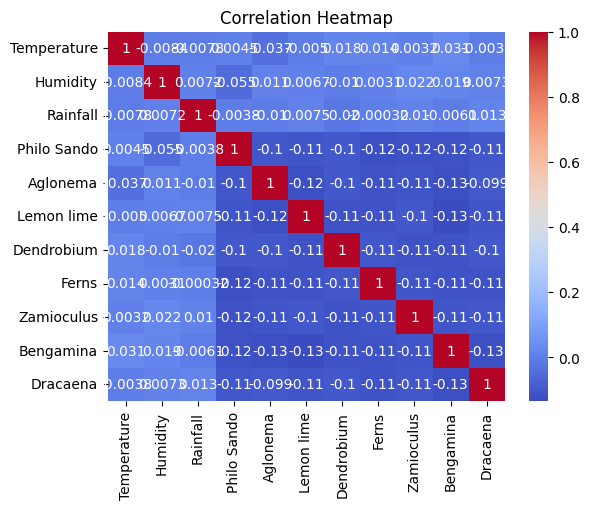

In [335]:
# Correlation heatmap
correlation_matrix = data_withoutOutliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model_data

In [336]:
model_data = data_withoutOutliers.copy()

In [337]:
model_data

,DateOfSale,Temperature,Humidity,Rainfall,Country,PotSize,Season,Event,HighestSalesPlant,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena
0,1/1/2012,27.0,81.0,227.57,France,5cm,Winter,IPM Dubai,Philo Sando,8950,2410,3880,3620,2510,2280,2900,3690
1,1/2/2012,25.0,80.0,166.40,France,5cm,Winter,Japan Grand Prix International Orchid Festival,Philo Sando,6930,4000,3110,2360,3270,3270,2970,2910
2,1/3/2012,26.0,78.0,147.26,France,8cm,Winter,IPM Dubai,Lemon lime,2470,3380,8570,3530,2650,3290,2530,3290
3,1/4/2012,25.0,81.0,191.72,United Kingdom,5cm,Winter,IPM Essen,Lemon lime,2420,2440,8880,2760,3570,3630,2670,2310
4,1/5/2012,27.0,77.0,236.65,Argentina,12cm,Winter,Japan Grand Prix International Orchid Festival,Aglonema,3270,5990,3160,2750,2400,2570,3080,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12/27/2022,29.0,83.0,227.73,France,5cm,Winter,IPM Dubai,Philo Sando,6000,2090,2620,2860,2220,2830,3130,2050
4014,12/28/2022,30.0,78.0,183.68,Argentina,5cm,Winter,IPM Essen,Ferns,3000,3550,2520,2430,5080,2630,3050,3880
4015,12/29/2022,31.0,79.0,229.71,Argentina,12cm,Winter,IPM Dubai,Ferns,2090,3380,3530,3690,6990,3690,2160,3920
4016,12/30/2022,25.0,74.0,170.50,Argentina,12cm,Winter,IPM Dubai,Zamioculus,3430,3090,3540,3930,3500,6410,3980,2120


In [338]:
model_data.dtypes

DateOfSale            object
Temperature          float64
Humidity             float64
Rainfall             float64
Country               object
PotSize               object
Season                object
Event                 object
HighestSalesPlant     object
Philo Sando            int64
Aglonema               int64
Lemon lime             int64
Dendrobium             int64
Ferns                  int64
Zamioculus             int64
Bengamina              int64
Dracaena               int64
dtype: object

In [339]:
# Categorical columns
categorical_model_columns = ['PotSize']


In [340]:
# Numerical columns (excluding DateOfSale)
numerical_model_columns = ['Temperature', 'Humidity', 'Rainfall']


In [341]:
# Create the categorical_model_data DataFrame
categorical_model_data = model_data[categorical_model_columns].copy()

# Create the numerical_model_data DataFrame
numerical_model_data = model_data[numerical_model_columns].copy()


In [342]:
categorical_model_data

,PotSize
0,5cm
1,5cm
2,8cm
3,5cm
4,12cm
...,...
4013,5cm
4014,5cm
4015,12cm
4016,12cm


In [343]:
numerical_model_data

,Temperature,Humidity,Rainfall
0,27.0,81.0,227.57
1,25.0,80.0,166.40
2,26.0,78.0,147.26
3,25.0,81.0,191.72
4,27.0,77.0,236.65
...,...,...,...
4013,29.0,83.0,227.73
4014,30.0,78.0,183.68
4015,31.0,79.0,229.71
4016,25.0,74.0,170.50


In [344]:
#MINMAX SCALER

In [345]:
#Handling numerical data by scaling

In [346]:
# Create a MinMaxScaler with a custom feature range
custom_min = 0  # Specify the minimum value
custom_max = 1  # Specify the maximum value

In [347]:
# Initialize the scalers
min_max_scaler = MinMaxScaler(feature_range=(custom_min, custom_max))

In [348]:
# Fit and transform using the min-max scaler
scaled_numerical_data_minmax = minmax_scaler.fit_transform(numerical_model_data[numerical_model_columns])

In [349]:
scaled_numerical_data_minmax_df = pd.DataFrame(scaled_numerical_data_minmax, columns=numerical_model_columns)

In [350]:
scaled_numerical_data_minmax_df

,Temperature,Humidity,Rainfall
0,0.375,0.666667,0.854656
1,0.125,0.583333,0.213192
2,0.250,0.416667,0.012479
3,0.125,0.666667,0.478712
4,0.375,0.333333,0.949874
...,...,...,...
4013,0.625,0.833333,0.856334
4014,0.750,0.416667,0.394400
4015,0.875,0.500000,0.877097
4016,0.125,0.083333,0.256187


In [351]:
#Handling Categorical data by one hot encoding

In [352]:
# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)  # You can adjust the sparse parameter as needed

In [353]:
# Fit and transform the encoder on your categorical data
onehot_encoded_data = onehot_encoder.fit_transform(categorical_model_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [354]:
# Convert the NumPy array to a Pandas DataFrame
onehot_encoded_dataframe = pd.DataFrame(onehot_encoded_data)

In [355]:
onehot_encoded_dataframe

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
4013,0.0,1.0,0.0
4014,0.0,1.0,0.0
4015,1.0,0.0,0.0
4016,1.0,0.0,0.0


In [356]:
import joblib

# Save the one-hot encoder and min-max scaler to PKL files
joblib.dump(onehot_encoder, 'one_hot_encoder.pkl')
joblib.dump(minmax_scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [357]:
modeling_data = pd.concat([onehot_encoded_dataframe, scaled_numerical_data_minmax_df], axis=0, ignore_index=True)

In [358]:
modeling_data.to_csv('HandledData_demand_new.csv', index=False)

In [359]:
final_model_data = pd.read_csv('/content/drive/MyDrive/PP2/Demand/ModelData_U.csv')

In [360]:
final_model_data

,PotSize_12cm,PotSize_5cm,PotSize_8cm,Temperature,Humidity,Rainfall
0,0,1,0,0.375,0.666667,0.854656
1,0,1,0,0.125,0.583333,0.213192
2,0,0,1,0.250,0.416667,0.012479
3,0,1,0,0.125,0.666667,0.478712
4,1,0,0,0.375,0.333333,0.949874
...,...,...,...,...,...,...
4013,0,1,0,0.625,0.833333,0.856334
4014,0,1,0,0.750,0.416667,0.394400
4015,1,0,0,0.875,0.500000,0.877097
4016,1,0,0,0.125,0.083333,0.256187


In [361]:
FinalData = pd.read_csv('/content/drive/MyDrive/PP2/Demand/FinalData_U.csv')

In [362]:
FinalData

,PotSize_12cm,PotSize_5cm,PotSize_8cm,Temperature,Humidity,Rainfall,Philo Sando,Aglonema,Lemon lime,Dendrobium,Ferns,Zamioculus,Bengamina,Dracaena
0,0,1,0,0.375,0.666667,0.854656,8950,2410,3880,3620,2510,2280,2900,3690
1,0,1,0,0.125,0.583333,0.213192,6930,4000,3110,2360,3270,3270,2970,2910
2,0,0,1,0.250,0.416667,0.012479,2470,3380,8570,3530,2650,3290,2530,3290
3,0,1,0,0.125,0.666667,0.478712,2420,2440,8880,2760,3570,3630,2670,2310
4,1,0,0,0.375,0.333333,0.949874,3270,5990,3160,2750,2400,2570,3080,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,0,1,0,0.625,0.833333,0.856334,6000,2090,2620,2860,2220,2830,3130,2050
4014,0,1,0,0.750,0.416667,0.394400,3000,3550,2520,2430,5080,2630,3050,3880
4015,1,0,0,0.875,0.500000,0.877097,2090,3380,3530,3690,6990,3690,2160,3920
4016,1,0,0,0.125,0.083333,0.256187,3430,3090,3540,3930,3500,6410,3980,2120


In [363]:
print(FinalData.columns)


Index(['PotSize_12cm', 'PotSize_5cm', 'PotSize_8cm', 'Temperature', 'Humidity',
       'Rainfall', 'Philo Sando', 'Aglonema', 'Lemon lime', 'Dendrobium',
       'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena'],
      dtype='object')


In [364]:
# Define the target columns and feature columns
target_columns = ['Philo Sando', 'Aglonema', 'Lemon lime', 'Dendrobium', 'Ferns', 'Zamioculus', 'Bengamina', 'Dracaena']
feature_columns = ['PotSize_12cm', 'PotSize_5cm', 'PotSize_8cm','Temperature', 'Humidity', 'Rainfall']


In [365]:
# Create a new DataFrame for target columns
target_data = FinalData[target_columns]

# Create a new DataFrame for feature columns
feature_data = FinalData[feature_columns]

Model Implementation

Random Forest Regressor

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train_all = FinalData[feature_columns]  # Assuming your DataFrame is named model_final_data
y_train_all = FinalData[target_columns]

# Assuming you want to split your data into a 70-30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.3, random_state=42)

# Loop through each target column and train Random Forest Regressor
for target_column in target_columns:
    y_train_single = y_train[target_column]  # Extract the target column for this iteration
    y_test_single = y_test[target_column]    # Extract the target column for this iteration

    # Initialize the Random Forest Regressor
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    random_forest_model.fit(X_train, y_train_single)

    # Predict on the test set
    y_pred = random_forest_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_single, y_pred))
    print(f'Random Forest RMSE for {target_column}: {rmse}')


Random Forest RMSE for Philo Sando: 1583.931165905048
Random Forest RMSE for Aglonema: 1662.3441117435368
Random Forest RMSE for Lemon lime: 1599.7378801114335
Random Forest RMSE for Dendrobium: 1560.9415739775816
Random Forest RMSE for Ferns: 1622.465572194487
Random Forest RMSE for Zamioculus: 1602.444731193999
Random Forest RMSE for Bengamina: 1574.3220495178155
Random Forest RMSE for Dracaena: 1558.8449454334723


# Gradient Boosting Regressor

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train_all = FinalData[feature_columns]  # Assuming your DataFrame is named model_final_data
y_train_all = FinalData[target_columns]

# Assuming you want to split your data into a 70-30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.3, random_state=42)

# Loop through each target column and train Gradient Boosting Regressor
for target_column in target_columns:
    y_train_single = y_train[target_column]  # Extract the target column for this iteration
    y_test_single = y_test[target_column]    # Extract the target column for this iteration

    # Initialize the Gradient Boosting Regressor
    gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Train the model
    gradient_boosting_model.fit(X_train, y_train_single)

    # Predict on the test set
    y_pred = gradient_boosting_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_single, y_pred))
    print(f'Gradient Boosting RMSE for {target_column}: {rmse}')


Gradient Boosting RMSE for Philo Sando: 1482.9142481295667
Gradient Boosting RMSE for Aglonema: 1571.7932624842929
Gradient Boosting RMSE for Lemon lime: 1505.6635795177447
Gradient Boosting RMSE for Dendrobium: 1461.7990645481755
Gradient Boosting RMSE for Ferns: 1542.0999988414173
Gradient Boosting RMSE for Zamioculus: 1474.438976180167
Gradient Boosting RMSE for Bengamina: 1481.5746917306633
Gradient Boosting RMSE for Dracaena: 1485.4352747553105


# Linear Regression

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train_all = FinalData[feature_columns]  # Assuming your DataFrame is named model_final_data
y_train_all = FinalData[target_columns]

# Assuming you want to split your data into a 70-30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.3, random_state=42)

# Loop through each target column and train Linear Regression
for target_column in target_columns:
    y_train_single = y_train[target_column]  # Extract the target column for this iteration
    y_test_single = y_test[target_column]    # Extract the target column for this iteration

    # Initialize the Linear Regression model
    linear_regression_model = LinearRegression()

    # Train the model
    linear_regression_model.fit(X_train, y_train_single)

    # Predict on the test set
    y_pred = linear_regression_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_single, y_pred))
    print(f'Linear Regression RMSE for {target_column}: {rmse}')


Linear Regression RMSE for Philo Sando: 1483.3472446102662
Linear Regression RMSE for Aglonema: 1547.6766763530952
Linear Regression RMSE for Lemon lime: 1490.2997761811455
Linear Regression RMSE for Dendrobium: 1435.5592914506578
Linear Regression RMSE for Ferns: 1525.0945064917596
Linear Regression RMSE for Zamioculus: 1451.85328580947
Linear Regression RMSE for Bengamina: 1463.0830155694384
Linear Regression RMSE for Dracaena: 1463.8860515390354


# Neural Network (Using MLPRgressor)

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train_all = FinalData[feature_columns]  # Assuming your DataFrame is named model_final_data
y_train_all = FinalData[target_columns]

# Assuming you want to split your data into a 70-30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.3, random_state=42)

# Loop through each target column and train MLP Regressor
for target_column in target_columns:
    y_train_single = y_train[target_column]  # Extract the target column for this iteration
    y_test_single = y_test[target_column]    # Extract the target column for this iteration

    # Initialize the MLP Regressor model
    mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(100, ), random_state=42)

    # Train the model
    mlp_regressor_model.fit(X_train, y_train_single)

    # Predict on the test set
    y_pred = mlp_regressor_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_single, y_pred))
    print(f'MLP Regressor RMSE for {target_column}: {rmse}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Philo Sando: 1669.3122874979142


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Aglonema: 1746.8634712713977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Lemon lime: 1655.4027675530767


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Dendrobium: 1596.498248015436


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Ferns: 1705.3638380243563


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Zamioculus: 1598.4031431540427


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor RMSE for Bengamina: 1631.4976251374128
MLP Regressor RMSE for Dracaena: 1648.147218030122


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [370]:
#ACCURACY

In [371]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# Initialize MLP Regressor model
neural_network_model = MLPRegressor(hidden_layer_sizes=(100, ), random_state=42)

# Loop through each target column and calculate R^2 for each model
for target_column in target_columns:
    X_train_rf = X_train  # Use the same training data as before
    y_train_rf = y_train[target_column]  # Extract the target column for this iteration
    X_test_rf = X_test  # Use the same testing data as before
    y_test_rf = y_test[target_column]  # Extract the target column for this iteration

    # Train Random Forest model
    random_forest_model.fit(X_train_rf, y_train_rf)

    # Predict on the test set using Random Forest
    y_pred_rf = random_forest_model.predict(X_test_rf)

    # Calculate R^2 for Random Forest
    r2_rf = r2_score(y_test_rf, y_pred_rf)

    # Print R^2 value for Random Forest
    print(f'R^2 for {target_column} (Random Forest): {r2_rf * 100:.2f}%')

    # Repeat the same process for other models (Gradient Boosting, Linear Regression, and Neural Network)
    X_train_gb = X_train_rf  # Use the same training data for Gradient Boosting
    X_test_gb = X_test_rf    # Use the same testing data for Gradient Boosting

    gradient_boosting_model.fit(X_train_gb, y_train_rf)
    y_pred_gb = gradient_boosting_model.predict(X_test_gb)
    r2_gb = r2_score(y_test_rf, y_pred_gb)
    print(f'R^2 for {target_column} (Gradient Boosting): {r2_gb * 100:.2f}%')

    X_train_lr = X_train_rf  # Use the same training data for Linear Regression
    X_test_lr = X_test_rf    # Use the same testing data for Linear Regression

    linear_regression_model.fit(X_train_lr, y_train_rf)
    y_pred_lr = linear_regression_model.predict(X_test_lr)
    r2_lr = r2_score(y_test_rf, y_pred_lr)
    print(f'R^2 for {target_column} (Linear Regression): {r2_lr * 100:.2f}%')

    X_train_nn = X_train_rf  # Use the same training data for Neural Network
    X_test_nn = X_test_rf    # Use the same testing data for Neural Network

    neural_network_model.fit(X_train_nn, y_train_rf)
    y_pred_nn = neural_network_model.predict(X_test_nn)
    r2_nn = r2_score(y_test_rf, y_pred_nn)
    print(f'R^2 for {target_column} (Neural Network): {r2_nn * 100:.2f}%')


R^2 for Philo Sando (Random Forest): -13.78%
R^2 for Philo Sando (Gradient Boosting): 0.27%
R^2 for Philo Sando (Linear Regression): 0.21%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Philo Sando (Neural Network): -26.38%
R^2 for Aglonema (Random Forest): -15.51%
R^2 for Aglonema (Gradient Boosting): -3.27%
R^2 for Aglonema (Linear Regression): -0.12%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Aglonema (Neural Network): -27.55%
R^2 for Lemon lime (Random Forest): -15.58%
R^2 for Lemon lime (Gradient Boosting): -2.39%
R^2 for Lemon lime (Linear Regression): -0.31%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Lemon lime (Neural Network): -23.77%
R^2 for Dendrobium (Random Forest): -18.25%
R^2 for Dendrobium (Gradient Boosting): -3.71%
R^2 for Dendrobium (Linear Regression): -0.02%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Dendrobium (Neural Network): -23.70%
R^2 for Ferns (Random Forest): -13.43%
R^2 for Ferns (Gradient Boosting): -2.47%
R^2 for Ferns (Linear Regression): -0.22%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Ferns (Neural Network): -25.32%
R^2 for Zamioculus (Random Forest): -22.14%
R^2 for Zamioculus (Gradient Boosting): -3.41%
R^2 for Zamioculus (Linear Regression): -0.26%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Zamioculus (Neural Network): -21.52%
R^2 for Bengamina (Random Forest): -15.77%
R^2 for Bengamina (Gradient Boosting): -2.53%
R^2 for Bengamina (Linear Regression): 0.01%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 for Bengamina (Neural Network): -24.33%
R^2 for Dracaena (Random Forest): -13.70%
R^2 for Dracaena (Gradient Boosting): -3.24%
R^2 for Dracaena (Linear Regression): -0.27%
R^2 for Dracaena (Neural Network): -27.10%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [372]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import numpy as np

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), random_state=42)
}

# Create a dictionary to store R^2 values for each model
r2_scores = {model_name: [] for model_name in models}

# Loop through each target column
for target_column in target_columns:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all[target_column], test_size=0.3, random_state=42)

    # Loop through each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate R^2 for the model
        r2 = r2_score(y_test, y_pred)

        # Append R^2 value to the dictionary
        r2_scores[model_name].append(r2)

# Convert the dictionary to a DataFrame for easier analysis
r2_df = pd.DataFrame(r2_scores, index=target_columns)

# Find the best model for each target column based on the highest R^2 score
best_models = r2_df.idxmax(axis=1)

# Print the best models for each target column
print("Best models for each target column:")
print(best_models)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best models for each target column:
Philo Sando    Gradient Boosting
Aglonema       Linear Regression
Lemon lime     Linear Regression
Dendrobium     Linear Regression
Ferns          Linear Regression
Zamioculus     Linear Regression
Bengamina      Linear Regression
Dracaena       Linear Regression
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


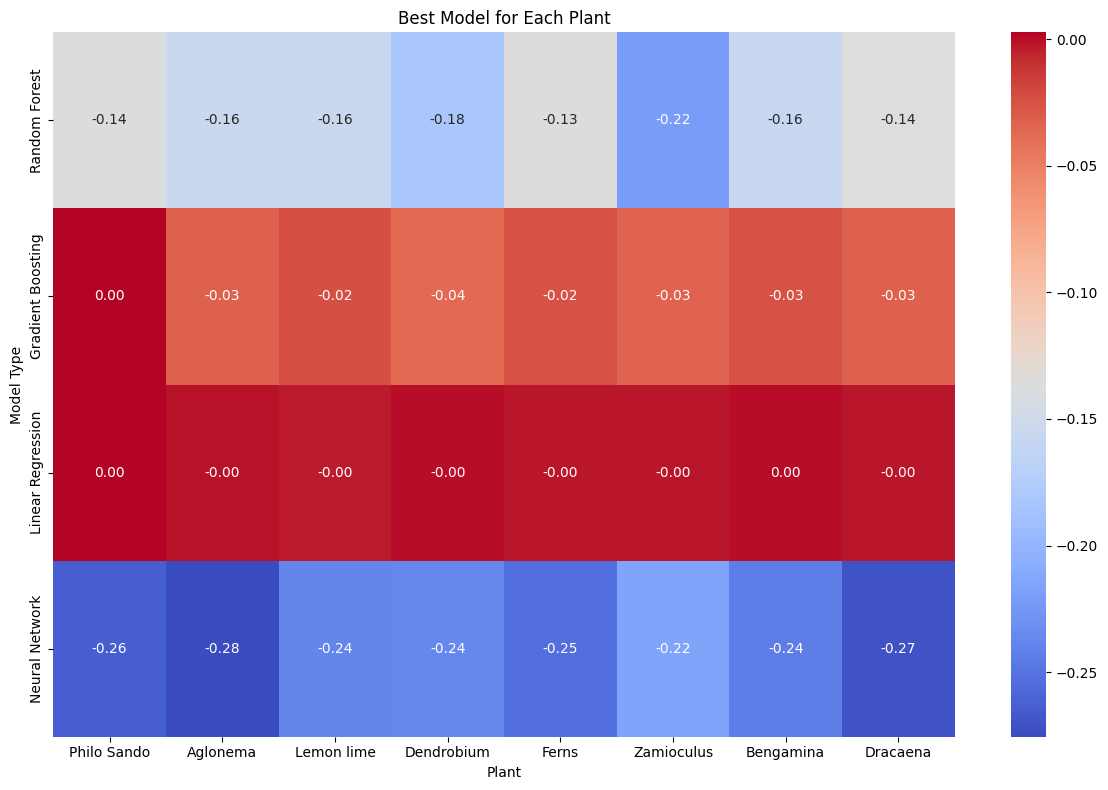

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table from the "best_models" DataFrame to prepare the data for the heatmap
pivot_table = r2_df.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Best Model for Each Plant')
plt.xlabel('Plant')
plt.ylabel('Model Type')

# Show the plot
plt.tight_layout()
plt.show()


In [373]:
# the best approach is Linear regression

In [374]:
import joblib

# Assuming you have a trained Linear Regression model named 'linear_regression_model'
model_filename = 'demand.pkl'

# Save the Linear Regression model to a PKL file
joblib.dump(linear_regression_model, model_filename)

print(f'Saved Linear Regression model as {model_filename}')


Saved Linear Regression model as demand.pkl


Prediction


In [389]:
import joblib
import pandas as pd

# Load the preprocessing objects from PKL files
one_hot_encoder = joblib.load('one_hot_encoder.pkl')
min_max_scaler = joblib.load('min_max_scaler.pkl')

# Load the trained Linear Regression model from the PKL file
model_filename = 'demand.pkl'
linear_regression_model = joblib.load(model_filename)

# Define your input data as a dictionary, where keys are the feature names and values are the feature values.
input_data = {
    'PotSize': '5cm',  # Provide the pot size as a string
    'Temperature': 25,
    'Humidity': 81,
    'Rainfall': 50,
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Perform one-hot encoding for the 'PotSize' column
encoded_data = one_hot_encoder.transform(input_df[['PotSize']])

# Get feature names after one-hot encoding
encoded_feature_names = one_hot_encoder.get_feature_names_out(input_df[['PotSize']].columns)

# Scale the numeric columns (excluding 'PotSize') using the saved scaler
numeric_columns = input_df[['Temperature', 'Humidity', 'Rainfall']]
scaled_data = min_max_scaler.transform(numeric_columns)

# Combine the encoded 'PotSize' column and scaled numeric columns
preprocessed_data = pd.concat([pd.DataFrame(encoded_data, columns=encoded_feature_names),
                              pd.DataFrame(scaled_data, columns=numeric_columns.columns)], axis=1)

# Make the prediction using the preprocessed input data and convert it to an integer
prediction = int(linear_regression_model.predict(preprocessed_data))

print(f'Demand prediction: {prediction}')


Demand prediction: 3321
